In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Generating the dataset {-}

In [15]:
def generate(k):
    
    # Initializing the constants. m here represents the number of features and not the number of datapoints.
    m, mu, sigma_sq = 20, 0, 0.1
    X, Y = np.zeros([k, m+1]), np.zeros([k,])
    
    for j in range(k):
        x_val, y_val = [], []
        
        # The first term is the bias
        x_val.append(1)
        
        def generate_x():
            for i in range(m):
                if i < 11 or i > 15:
                    x_val.append(np.random.normal(mu, 1))
                elif i == 11:
                    x_val.append(x_val[1] + x_val[2] + np.random.normal(mu, sigma_sq))
                elif i == 12:
                    x_val.append(x_val[3] + x_val[4] + np.random.normal(mu, sigma_sq))
                elif i == 13:
                    x_val.append(x_val[5] + x_val[6] + np.random.normal(mu, sigma_sq))
                elif i == 14:
                    x_val.append((0.1 * x_val[7]) + np.random.normal(mu, sigma_sq))
                elif i == 15:
                    x_val.append((2 * x_val[2]) - 10 + np.random.normal(mu, sigma_sq))
            X[j] = np.array(x_val)


        def generate_y(x):
            for i in range(1, 11):
                a = ((0.6 ** i) * x[i])
            Y[j] = 10 + a + np.random.normal(mu, sigma_sq)

            
        generate_x()
        generate_y(x_val)
    plt.scatter([p+1 for p in range(k)], Y)
    plt.show()
    return X, Y

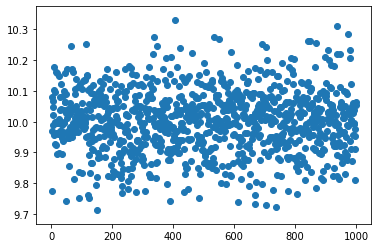

In [20]:
# The parameter passed here is the 'm', i.e., number of datapoints.
lr_x, lr_y = generate(1000)

In [43]:
# Writing a naive Linear Regression class and generating weights {-}

In [44]:
# Training a model and getting the weights.
lr = Linear_Regression()
lr_weights = lr.naive_linear_regression(lr_x, lr_y)

## Plotting the weights {-}

[ 9.49993062e+00  5.34463393e-02  1.51581275e-01  2.71470010e-02
 -4.13409268e-02 -3.67972128e-02 -5.44532859e-02 -7.51875431e-03
  2.24787824e-02  4.50932080e-02 -4.11489547e-02 -4.56256271e-02
 -1.80952686e-02 -9.01104923e-03  3.97951554e-02  6.64811833e-02
 -5.50100369e-02  4.64703468e-02 -1.24883456e-02 -4.79605300e-02
 -2.65038851e-02]


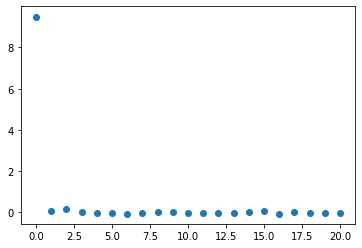

In [6]:
print(lr_weights)
plt.scatter([i for i in range(21)], lr_weights)
plt.show()

# Question - What are true biases and weights are.

The formula for calculating y is given as - <br>
$Y = 10 + \sum^{10}_{i=1} (0.6)^i X_i + N$ <br>
From this formula, would we consider true bias as 10? <br>
What would be the true weights?

## Comparison with "True weights and biases" {-}

From our true model, we can see that the true bias value is 10. Also, we can see that the true weights would be $(0.6)^i$. 
As our bias value is the first term in weights, we can compare it with the true bias.

Don't know about true weights

In [7]:
true_bias = 10
model_bias = lr_weights[0]
print("The difference between true bias and the bias from the model is {}".format(true_bias-model_bias))

The difference between true bias and the bias from the model is 0.5000693827896825


## Most and least significant features {-}

In [8]:
print("Most significant feature is {}".format(np.argmax(lr_weights[1:])+1))
print("Least significant feature is {}".format(np.argmin(lr_weights[1:])+1))

Most significant feature is 2
Least significant feature is 16


## Finding the training error {-}

In [9]:
prediction = lr.predict(lr_x, lr_weights)
mse = (np.square(prediction - lr_y)).mean()
print("Mean Squared training error is {}".format(mse))

Mean Squared training error is 0.009132060539966565


In [10]:
print(prediction[:10], lr_y[:10])

[ 9.99816927  9.97942155 10.01172894  9.97497427  9.99256178  9.99961322
 10.02725613 10.00106492 10.01447174 10.01343766] [ 9.9885145   9.95500278  9.98699315 10.1939712   9.81604774  9.96162314
  9.77942016  9.93360876  9.96308559 10.09891081]


## Checking if any weights are pruned {-}

In [11]:
count = 0
for check_weight in lr_weights:
    if check_weight == 0:
        count += 1
print(count)

0


As we can see, there is no feature whose weight is 0. As a result, we can say that our algorithm did not prune any weight and considered all features for prediction.

## Testing our model on new data {-}

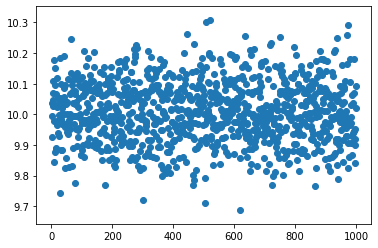

Testing error is 0.010184749110532708


In [12]:
test_x, test_y = generate(1000)
predict1 = lr.predict(test_x, lr_weights)
mse_testing = (np.square(predict1 - test_y)).mean()
print("Testing error is {}".format(mse_testing))

# Ridge Regerssion {-}

In [13]:
class Ridge_Regression:
    def __init__(self, lam):
        # Passing the lambda value
        self.lam = lam
    
    def ridge_regression(self, x, y):
        # Getting the number of datapoints and number of features.
        m, k = x.shape
        identity = np.identity(k)
        
        # Initializing the weights to be zeros.
        self.weights = np.zeros((1, k))
        
        x_transpose = np.transpose(x)
        # Applying the ridge regression model to generate weights.
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(x_transpose, x) + (self.lam * identity)), x_transpose), y)
        return self.weights
    
    # This function is used to predict using the existing weights.
    def predict_ridge(self, x, weight):
        return np.dot(x, weight)

In [14]:
# Training a model and getting the weights.
rr = Ridge_Regression(0.0035)
rr_weights = rr.ridge_regression(lr_x, lr_y)

In [15]:
ridge_prediction = rr.predict_ridge(lr_x, rr_weights)
ridge_mse = (np.square(ridge_prediction - lr_y)).mean()
print("Training error is {}".format(ridge_mse))

Training error is 0.009143689367257204


## Testing the Ridge Regression model on a large dataset {-}

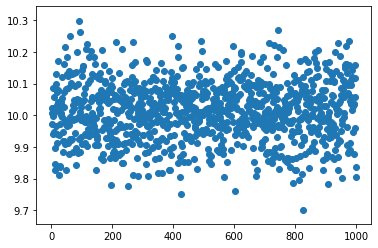

Testing error for ridge regression is 0.00927656713631504


In [16]:
test_rr_x, test_rr_y = generate(1000)
ridge_testing = rr.predict_ridge(test_rr_x, rr_weights)
ridge_testing_mse = (np.square(ridge_testing - test_rr_y)).mean()
print("Testing error for ridge regression is {}".format(ridge_testing_mse))

## Plotting against lambda for m = 1000 {-}

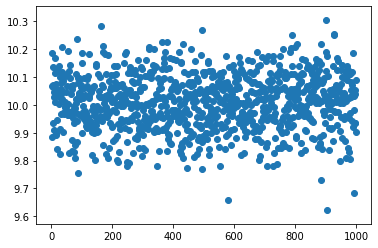

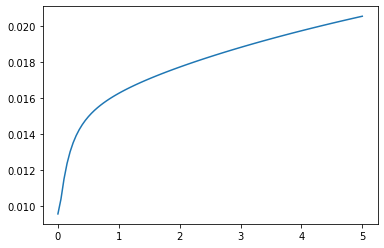

In [17]:
lambda_value = 0
error_list, m_list = [], []
x_val, y_val = generate(1000)
while lambda_value <= 5:
    lambda_rr = Ridge_Regression(lambda_value)
    lambda_rr_weights = lambda_rr.ridge_regression(x_val, y_val)
    ridge_pred = rr.predict_ridge(lr_x, lambda_rr_weights)
    error = (np.square(ridge_pred - lr_y)).mean()
#     error = (np.linalg.norm(ridge_prediction - lr_y)**2) + (rr.lam * np.linalg.norm(rr_weights)**2)
    m_list.append(lambda_value)
    error_list.append(error)
    lambda_value += 0.05

plt.plot(m_list, error_list)
plt.show()

## Plotting the weights {-}

[ 9.49993062e+00  5.34463393e-02  1.51581275e-01  2.71470010e-02
 -4.13409268e-02 -3.67972128e-02 -5.44532859e-02 -7.51875431e-03
  2.24787824e-02  4.50932080e-02 -4.11489547e-02 -4.56256271e-02
 -1.80952686e-02 -9.01104923e-03  3.97951554e-02  6.64811833e-02
 -5.50100369e-02  4.64703468e-02 -1.24883456e-02 -4.79605300e-02
 -2.65038851e-02]


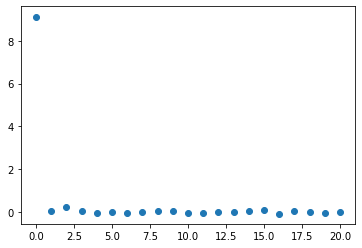

In [18]:
print(lr_weights)
plt.scatter([i for i in range(21)], rr_weights)
plt.show()

## Checking if any weights are pruned for ridge regression {-}

In [19]:
count = 0
for check_weight in rr_weights:
    if check_weight == 0:
        count += 1
print(count)

0


In [20]:
print("Most significant feature is {}".format(np.argmax(rr_weights[1:])+1))
print("Least significant feature is {}".format(np.argmin(rr_weights[1:])+1))

Most significant feature is 2
Least significant feature is 16


# Lasso Regression {-}

In [21]:
# class Lasso_Regression:
#     def __init__(self):
#         pass
#         # Passing the lambda value
# #         self.lam = lam
    
#     def lasso_regression(self, x, y, lam):
#         # Getting the number of datapoints and number of features.
# #         m, k = x.shape
# #         identity = np.identity(k)
        
# #         # Initializing the weights to be zeros.
# #         self.weights = np.ones((1, k))
        
# #         length = len(self.weights)
# #         for i in range(length):
# #             if (-self.lam/2) < self.weights[0][i] < self.lam/2:
# #                 self.weights[0][i] = 0
# #             elif self.weights[0][i] > self.lam/2:
# #                 self.weights[0][i] -= self.lam/2
# #             else:
# #                 self.weights[0][i] += self.lam/2
        
# #         return self.weights
#         m, n = x.shape
#         w = np.matrix(np.zeros((n,1)))
#         x, y = np.matrix(x), np.matrix([y])
# #         xt = x.transpose()
#         yt = y.transpose()

#         for _ in range(15):
#             for i in range(n):
#                 var1 = ((x[:,i].transpose())*(x[:,i]))[0,0] #0,0 is for change mat to value
#                 var2=0
#                 wthis=0
#                 for j in range(m):
#                     minu=0
#                     for k in range(n):
#                         if i!=k:
#                             minu+=x[j,k]*w[k,0]
#                     var2+=x[j,i]*(yt[j,0]-minu)
#                 if var2<-lam/2:
#                     wthis=(var2+lam/2)/var1
#                 elif var2>lam/2:
#                     wthis=(var2-lam/2)/var1
#                 else:
#                     wthis=0
#                 w[i,0]=wthis
#             #renew r
#             #rnew=(yt-x*w)
#             #rt=rnew.transpose()
#             #rnew=rt*rnew
#         return w.flatten()[0]
    
#     # This function is used to predict using the existing weights.
#     def predict_lasso(self, x, weight):
#         return np.dot(x, weight)

In [22]:
class Lasso_Regression:
    def __init__(self):
        pass
        # Passing the lambda value
#         self.lam = lam
    
    def check(self, rho, lamda):
        '''Soft threshold function used for normalized data and lasso regression'''
        if rho < - lamda:
            return (rho + lamda)
        elif rho >  lamda:
            return (rho - lamda)
        else: 
            return 0
    
    def lasso_regression(self, x, y, lam):
#         lamda = lam
#         intercept = False
#         m,n = X.shape
#         theta = np.ones((n,1))
#         X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before

#         #Looping until max number of iterations
#         for i in range(5): 

#             #Looping through each coordinate
#             for j in range(n):

#                 #Vectorized implementation
#                 X_j = X[:,j].reshape(-1,1)
#                 y_pred = X @ theta
#                 rho = X_j.T @ (y - y_pred  + theta[j]*X_j)

#                 #Checking intercept parameter
#                 if intercept == True:  
#                     if j == 0: 
#                         theta[j] =  rho 
#                     else:
#                         theta[j] =  self.soft_threshold(rho, lamda)  

#                 if intercept == False:
#                     theta[j] =  self.soft_threshold(rho, lamda)   

#         return theta.flatten()
    
        m, n = x.shape
        w = np.ones((n,1))
#         xt = x.transpose()
        yt = y.transpose()

        for _ in range(15):
            for i in range(n):
                x_j = x[:, i].reshape(-1,1)
                y_predicted = np.dot(x[i], w)
                rho = np.dot(((y[i] - y_predicted) + (w[i] * np.transpose(x_j))), x_j)
                
                w[i] = self.check(rho, lam)
                
        return w.flatten()
    
    # This function is used to predict using the existing weights.
    def predict_lasso(self, x, weight):
        return np.dot(x, weight)

C:\Users\harsh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
C:\Users\harsh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
C:\Users\harsh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in add


[ 7.41176108e+150 -7.40313298e+153  7.59411413e+156 -6.43772126e+159
  5.57296831e+162 -5.33988196e+165  5.93376651e+168 -6.66452284e+171
  4.68436641e+174 -4.59322326e+177  5.42198529e+180 -4.89822653e+183
  1.06947911e+187 -4.43223874e+190  1.88624491e+194 -3.77591800e+196
 -3.25050454e+199 -2.64897310e+203  2.19090028e+206 -2.35689755e+209
  2.45348450e+212]


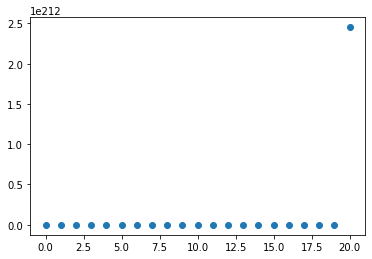

In [23]:
# Training a model and getting the weights.
lassor = Lasso_Regression()
lasso_weights = lassor.lasso_regression(lr_x, lr_y, 0.01)
print(lasso_weights)
plt.scatter([i for i in range(21)], lasso_weights)
plt.show()

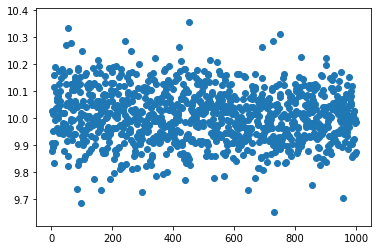

Testing error for ridge regression is inf


C:\Users\harsh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Need to change this
test_lasso_x, test_lasso_y = generate(1000)
ridge_testing = rr.predict_ridge(test_lasso_x, lasso_weights)
ridge_testing_mse = (np.square(ridge_testing - test_rr_y)).mean()
print("Testing error for ridge regression is {}".format(ridge_testing_mse))

Using online article

In [203]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
#     print(theta)
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X[i] @ theta
            rho = X_j.T @ (y[i] - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

In [48]:
print(initial_theta)

[[292.95357789]
 [  0.99896396]
 [  1.00002137]
 [  1.00000687]
 [  1.00002327]
 [  1.00006179]
 [  0.99991293]
 [  1.00008692]
 [  0.99988162]
 [  1.0000244 ]
 [  0.99996984]
 [  1.00015623]
 [  1.00041297]
 [  0.99975901]
 [  1.00001708]
 [  0.94178448]
 [  0.55418027]
 [  0.60074448]
 [  0.98176857]
 [  0.99903421]
 [  1.00005829]]


(0.05623413251903491,
 17782.794100389227,
 -12.894192031039353,
 5.740613976321513)

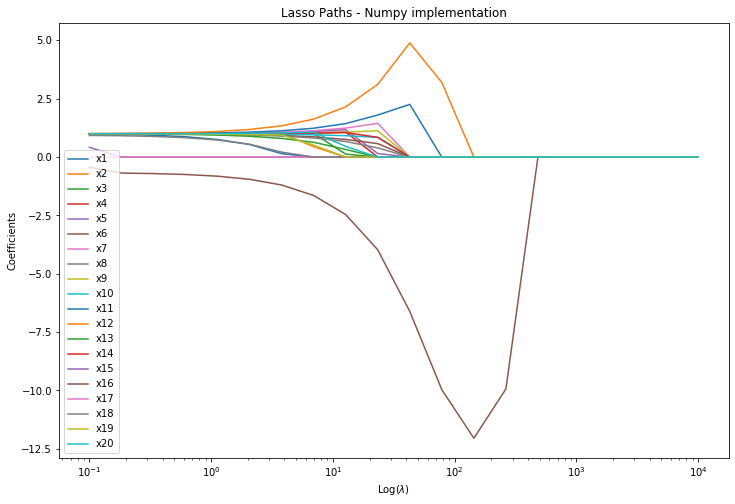

In [208]:
X = lr_x
y = lr_y
# Initialize variables
m,n = X.shape
initial_theta = np.ones((n, 1))
theta_list = list()
lamda = np.logspace(0,5,20)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=20)
    theta_list.append(theta)

theta_lasso = np.stack(theta_list).T
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

labels = ["x{}".format(i) for i in range(n)]
for i in range(1,n):
    plt.plot(lamda, theta_lasso[i], label = labels[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

In [188]:
print(theta_lasso.shape)

(21, 300)


# Experimenting

In [ ]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < -lamda/2:
        return (rho + (lamda)/2)
    elif rho >  lamda/2:
        return (rho - (lamda)/2)
    else: 
        return 0
    

def coordinate_descent_lasso(theta, X, y, lamda = .01, num_iters=100):
    
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0))
    
    for _ in range(num_iters): 
        
        for j in range(n):
            
            summation = 0
            for i in range(m):
                summation += (X[i][j] * ((y[i] - np.dot(X[i], theta.reshape(-1,1))) +  np.dot(X[i][j], theta[j])))
            
            if j == 0:
                theta[j] = summation
            else:
                theta[j] =  soft_threshold(summation, lamda)   
            
    return theta.flatten()

In [ ]:
X = lr_x
y = lr_y
# Initialize variables
m,n = X.shape
initial_theta = np.ones((n, 1))
theta_list = list()
# lamda = np.logspace(0,2,10)/10 #Range of lambda values
lamda = 0
lamda_array = []
while lamda < 0.5:
    lamda_array.append(lamda)
    lamda += 0.05
#Run lasso regression for each lambda
for l in lamda_array:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=20)
    theta_list.append(theta)

theta_lasso = np.stack(theta_list).T
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

labels = ["x{}".format(i) for i in range(n)]
for i in range(1, n):
    plt.plot(lamda_array, theta_lasso[i], label = labels[i])

# plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

In [ ]:
print(theta_lasso.shape)

print(theta_lasso.shape)

In [209]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < -lamda/2:
        return (rho + (lamda)/2)
    elif rho >  lamda/2:
        return (rho - (lamda)/2)
    else: 
        return 0
    

def coordinate_descent_lasso(theta, X, y, lamda = .01, num_iters=100):
    
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0))
    
    for _ in range(num_iters): 
        
        for j in range(n):
            
            summation = 0
            for i in range(m):
                summation += (X[i][j] * ((y[i] - np.dot(X[i], theta.reshape(-1,1))) +  np.dot(X[i][j], theta[j])))
            
            if j == 0:
                theta[j] = summation
            else:
                theta[j] =  soft_threshold(summation, lamda)   
            
    return theta.flatten()

(-0.024999999999999998,
 0.5249999999999999,
 -0.7299846897807987,
 2.372588032130252)

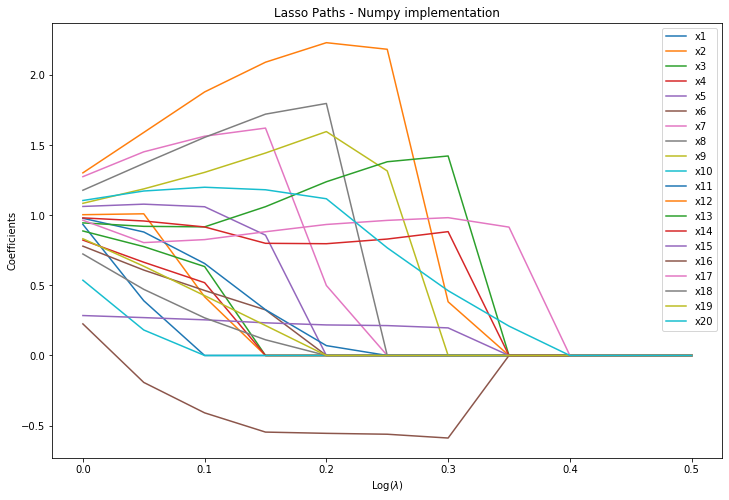

In [212]:
X = lr_x
y = lr_y
# Initialize variables
m,n = X.shape
initial_theta = np.ones((n, 1))
theta_list = list()
# lamda = np.logspace(0,2,10)/10 #Range of lambda values
lamda = 0
lamda_array = []
while lamda < 0.5:
    lamda_array.append(lamda)
    lamda += 0.05
#Run lasso regression for each lambda
for l in lamda_array:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=20)
    theta_list.append(theta)

theta_lasso = np.stack(theta_list).T
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

labels = ["x{}".format(i) for i in range(n)]
for i in range(1, n):
    plt.plot(lamda_array, theta_lasso[i], label = labels[i])

# plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

In [191]:
print(theta_lasso.shape)

(21, 11)
